# Import libraries:

In [1]:
import cv2
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

# Age 0-2:

In [4]:
def importPath(folder):
    path = f"images/{folder}/*.jpg"
    print(path)
    faceFiles = glob.glob(path)
    return faceFiles 

In [6]:
faceFiles = importPath('0_2')

images/0_2/*.jpg


In [7]:
pics = dict()
for foto in faceFiles:
    label = foto.split("/")[-2]
    pic = foto
    if label in pics:
        pics[label].append(pic)
    else:
        pics[label] = [pic]

In [9]:
im = []

for k,v in pics.items():
    for a in v:
        im.append([k,a])
faces_df =  pd.DataFrame(im, columns=["label","foto"])

display(faces_df.head())

,label,foto
0,0_2,images/0_2/image_669.jpg
1,0_2,images/0_2/image_1570.jpg
2,0_2,images/0_2/image_346.jpg
3,0_2,images/0_2/image_441.jpg
4,0_2,images/0_2/image_1055.jpg


In [10]:
faces_df.label.value_counts()

0_2    2491
Name: label, dtype: int64

In [11]:
ej = pics['0_2']
ej[0]

'images/0_2/image_669.jpg'

error: /build/opencv-iC2m9y/opencv-3.2.0+dfsg/modules/objdetect/src/cascadedetect.cpp:1681: error: (-215) !empty() in function detectMultiScale


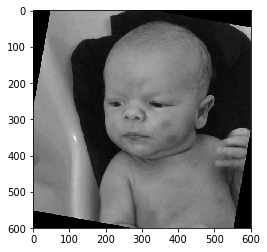

In [20]:
%matplotlib inline

face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_default.xml')


def extractFace(picFile, debug=False):
    im = cv2.imread(picFile)    
    im_bw = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    plt.imshow(im_bw, cmap="gray")
    # Face detection, OJO: esto detecta multiples caras
    faces = face_cascade.detectMultiScale(im_bw, 2, 4)

    if len(faces) == 0:
        print(f"Warning: no face detected on {picFile}")
        return 
    
    if debug:
        print(faces)
    selected_face = faces[0]
    discard_faces = faces[1:]
    
    if debug:
        debug_squares = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        # plot the invalid squares in blue
        for face in discard_faces:
            x,y,w,h = face
            debug_squares = cv2.rectangle(debug_squares, (x,y), (x+w,y+h),(0, 0, 255) ,5)
        # plot the selected face in red
        x,y,w,h = selected_face
        debug_squares = cv2.rectangle(debug_squares, (x,y), (x+w,y+h),(255, 0, 0) ,5)

        plt.imshow(debug_squares)

            
    # extract selected face as B&W 
    x,y,w,h = selected_face
    cara = im_bw[y:y+h,x:x+h]
    return cara

    
    
    
extractFace(ej[0], debug=True)